# Data cleaning for 'Train' and 'Test' csv

Overall procedure
1. Import libraries
2. Import csv
3. Search for suspicious data in Train Data
 
4. Fill null or na data **** Will do Data Cleaning for both Train and Test dataframes together ****
5. Categorise data into ordinal
6. Categorise data into numeric
7. Categorise data into nominal
8. Nominal -> get_dummies and form new dataset for both test and train
9. select top 5 features based on corr for ordinal and numeric and coming them into a DF
10. Combine numeric DF and nominal DF together
11. Save cleaned file to CSV


## 1. Import libraries

In [1]:
#import all relevant libs
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
import random
import pandas_profiling

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import os
from IPython.display import display
import fnmatch

## 2. Read csv for both files

In [2]:
train = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')
print('Train set data: ' ,train.shape)
print('Test set data: ' ,test.shape)


Train set data:  (2051, 81)
Test set data:  (879, 80)


In [3]:
train.columns.to_series().groupby(train.dtypes).groups

{dtype('int64'): Index(['Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
        'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF',
        'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
        'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
        'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
        'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
        'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
        'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
        'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
       dtype='object'),
 dtype('O'): Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
        'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
        'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
        'Exterior 1s

In [4]:
test.columns.to_series().groupby(train.dtypes).groups

{dtype('int64'): Index(['Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
        'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF',
        'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
        'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
        'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
        'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
       dtype='object'),
 dtype('float64'): Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
        'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
        'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
       dtype='object'),
 dtype('O'): Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
        'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
        'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
        'Exterior 1st', 'Exterior 2nd', '

## 3A. Clear off suspicious data ( Given from data dictionary )

SPECIAL NOTES:
There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely donít represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students.


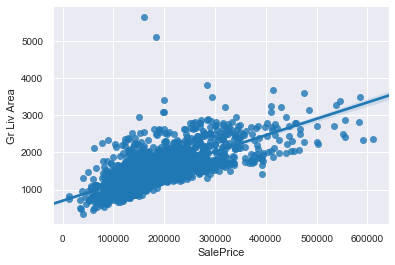

In [5]:
sns.regplot(x = train['SalePrice'], y = train['Gr Liv Area']);

#### 2 outliers found where sale prices is not consistant with 'Gr Liv Area',
Gr Liv Area > 5000 but sale price below average

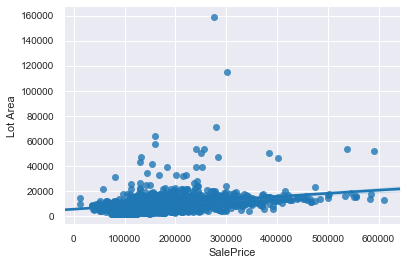

In [6]:
sns.regplot(x = train['SalePrice'], y = train['Lot Area']);

#### 2 outliers found where sale prices is not consistant with 'Lot Area' 
Lot area > 100000 sqft but pricing not consistant

## 3B. Clearing suspicious data or outliers

###  1. Remove outlier data based on information from 'Special Notes'

##### 'Identifiers'  Refer to Plot Graph for more information.
    A. "Gr Liv Area" 
    B. "Lot Area"

3.1.A Remove 2 Outlier from 'Gr Liv Area'

In [7]:
GrLiv_outlier =train[train['Gr Liv Area']> 4000][['SalePrice']].index

In [8]:
GrLiv_outlier.tolist()

[960, 1885]

In [9]:
#find unsual observation
train.drop(GrLiv_outlier.tolist(),axis = 0,inplace = True)

In [10]:
train.shape

(2049, 81)

3.1.B Remove Outlier from 'Lor Area'

In [11]:
train[train['Lot Area'] >100000].index.tolist()


[471, 694]

In [12]:
#find unsual observation where Lot area is too big
train.drop(train[train['Lot Area'] >100000].index.tolist(), axis = 0,inplace = True)

Check if the both columns 'Lot Area','SalePrice' have any null values

In [13]:
train['Lot Area'].isnull().sum()

0

In [14]:
train['SalePrice'].isnull().sum()

0

### 3C. Search for other possibilities of outliers
3.2.A Filter via Year 'year' , 

In [15]:
Year_cols = fnmatch.filter(train.columns,'*Year*')
Year_cols

['Year Built', 'Year Remod/Add']

###### ** 3.2.B.building cannot be renovated before it is build

In [16]:
train[(train[Year_cols[1]] -train[Year_cols[0]] <0)][Year_cols]

,Year Built,Year Remod/Add
1003,2002,2001


In [17]:
#No error within test year columns
test[(test[Year_cols[1]] - test[Year_cols[0]] <0 )][Year_cols].shape

(0, 2)

###### **3.2.C. remove suspicious data

In [18]:
train.drop([train[(train[Year_cols[1]] -train[Year_cols[0]] <0)].index[0]],inplace = True)

In [19]:
train.shape

(2046, 81)

## 4. Filling of Null and Na data points 
1. Cleaning both Train and Test Dataframes together
2. Filling Null or Na values via using either mean or mediam depending on Data Dictionary from kaggle

### 4A.Search of null values from numeric columns

In [20]:
train.describe(include='float').columns

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [21]:
numeric_columns =train._get_numeric_data().columns.tolist()
numeric_columns

['Id',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

### 4A.i. Null Values for Train Dataset columns

In [22]:
null_columns = train[numeric_columns].isnull().sum().sort_values(ascending = False)
null_columns = null_columns[null_columns>0]
null_columns

Lot Frontage      328
Garage Yr Blt     114
Mas Vnr Area       22
Bsmt Half Bath      2
Bsmt Full Bath      2
Garage Cars         1
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Garage Area         1
dtype: int64

### 4A.ii. Null values for Test Dataset columns

In [23]:
numeric_columns_test = numeric_columns
numeric_columns_test.pop() #remove 'SalePrice'

'SalePrice'

In [24]:
numeric_columns_test

['Id',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold']

In [25]:
null_columns_test = test[numeric_columns_test].isnull().sum().sort_values(ascending = False)
null_columns_test = null_columns_test[null_columns_test>0]
null_columns_test

Lot Frontage     160
Garage Yr Blt     45
Mas Vnr Area       1
dtype: int64

### 4B Resolves columns with Null Values from Train and Test data set together
#### 4B.i.i Resolve 'Lot Frontage' Null values Train and Test dataset

In [26]:
# Train Dataset
Lot_cols = fnmatch.filter(train.columns, 'Lot*')
Lot_cols
train[(train['Lot Frontage'].isnull()) & (train['Lot Area'] >0)][Lot_cols].head()

,Lot Frontage,Lot Area,Lot Shape,Lot Config
0,NaN,13517,IR1,CulDSac
7,NaN,12160,IR1,Inside
8,NaN,15783,Reg,Inside
23,NaN,7980,IR1,Inside
27,NaN,11700,IR1,Inside


In [27]:
#Test Dataset
test[(test['Lot Frontage'].isnull())][Lot_cols].head()

,Lot Frontage,Lot Area,Lot Shape,Lot Config
1,NaN,9662,IR1,Inside
4,NaN,9500,IR1,Inside
7,NaN,9286,IR1,CulDSac
13,NaN,7976,Reg,Inside
20,NaN,8246,IR1,Inside


#### 4B.i.ii. Fill Na with median values Train and Test dataset

In [28]:
train['Lot Frontage'].fillna(train['Lot Frontage'].median(),inplace = True)

In [29]:
test['Lot Frontage'].fillna(test['Lot Frontage'].median(),inplace = True)
test['Lot Frontage'].isnull().sum()

0

#### 4B.ii.i Resolve Train Data set for 'Garage Yr Blt' Train dataset
Missing value for Garage Yr Blt means property does not have Garage and has not build it in any year. 

In [30]:
Garage_cols = fnmatch.filter(train.columns, '*Garage*')
#Train Dataset
#From Above there are 114 values that have issues
train[Garage_cols][(train['Garage Yr Blt'].isnull())].head()

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
28,NaN,NaN,NaN,0.0,0.0,NaN,NaN
53,NaN,NaN,NaN,0.0,0.0,NaN,NaN
65,NaN,NaN,NaN,0.0,0.0,NaN,NaN
79,NaN,NaN,NaN,0.0,0.0,NaN,NaN
101,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [31]:
#Train Dataset
train[Garage_cols][(train['Garage Yr Blt'].isnull())& (train['Garage Type'].isnull())].shape

(113, 7)

In [32]:
train[Garage_cols][(train['Garage Yr Blt'].isnull())& (train['Garage Type'].notnull())]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1712,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


1 missing value between garage type and garage Yr blt, Resolve this issue first!
Assume that the data that was key in was incorrect and this property has no garage

In [33]:
change_val =train[Garage_cols][(train['Garage Yr Blt'].isnull())& (train['Garage Type'].notnull())].index

In [34]:
train.loc[change_val,'Garage Type']=np.nan

#### 4B.ii.ii. Will replace NaN values with 0.
1. In the later part, will Proposed new column to take year sold - garage yr blt to obtain 'age of garage'.

In [35]:
train['Garage Yr Blt'].fillna(value = 0 , inplace = True)

In [36]:
train[Garage_cols][(train['Garage Yr Blt'] == 0)].shape

(114, 7)

In [37]:
train['Garage Yr Blt'].describe() 

count    2046.000000
mean     1868.431085
std       454.648071
min         0.000000
25%      1957.000000
50%      1978.000000
75%      2001.000000
max      2207.000000
Name: Garage Yr Blt, dtype: float64

##### 4B.ii.iii. Max value does not max sense ( 'Garage Yr Blt'  year 2207)
check by plotting histogram # Results of histogram indicates that there is an outlier, hence skewed right

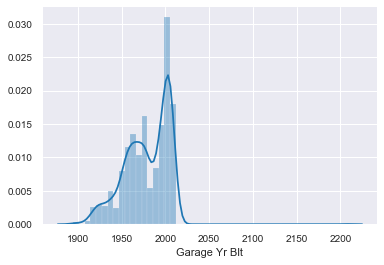

In [38]:
sns.distplot(train['Garage Yr Blt'][(train['Garage Yr Blt'] > 0)])

In [39]:
# indication that 1 outlier lies outside of expectation. towards 
train['Garage Yr Blt'][(train['Garage Yr Blt'] > 2050)]

1699    2207.0
Name: Garage Yr Blt, dtype: float64

In [40]:
#Find out when this property was build.
train[Year_cols][train['Garage Yr Blt'] == 2207]

,Year Built,Year Remod/Add
1699,2006,2007


In [41]:
# Replace garage built with year build
train.loc[[1699], 'Garage Yr Blt'] = 2006

In [42]:
train['Garage Yr Blt'].describe() 

count    2046.000000
mean     1868.332845
std       454.596590
min         0.000000
25%      1957.000000
50%      1978.000000
75%      2001.000000
max      2010.000000
Name: Garage Yr Blt, dtype: float64

## Resolve Test Data set for 'Garage Yr Blt'

In [43]:
#Test Dataset
#From Above there should be 45 rows that need to be resolve
test[Garage_cols][(test['Garage Yr Blt'].isnull())].head()

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
29,NaN,NaN,NaN,0.0,0.0,NaN,NaN
45,NaN,NaN,NaN,0.0,0.0,NaN,NaN
66,NaN,NaN,NaN,0.0,0.0,NaN,NaN
68,NaN,NaN,NaN,0.0,0.0,NaN,NaN
106,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [44]:
test[Garage_cols][(test['Garage Yr Blt'].isnull())& (test['Garage Type'].notnull())]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
765,Detchd,NaN,NaN,1.0,360.0,NaN,NaN


Since Data is not provided for ordinal 'Garage columns, assume that this property has no Garage

In [45]:
change_val_test_index =test[Garage_cols][(test['Garage Yr Blt'].isnull())& (test['Garage Type'].notnull())].index.tolist()

In [46]:
test.loc[change_val_test_index,'Garage Type'] = np.nan

Will replace NaN values with 0.
1. In the later part, will Proposed new column to take year sold - garage yr blt to obtain 'age of garage'.

In [47]:
test['Garage Yr Blt'].fillna(value = 0 , inplace = True)

In [48]:
test['Garage Yr Blt'][(test['Garage Yr Blt'] == 0)].shape

(45,)

In [49]:
test['Garage Yr Blt'].describe() 

count     879.000000
mean     1875.594994
std       436.640608
min         0.000000
25%      1957.000000
50%      1977.000000
75%      2000.000000
max      2010.000000
Name: Garage Yr Blt, dtype: float64

## 3. Resolve Null Values from Train dataset Mas Vnr Area
Mas Vnr Area : Masonry veneer area in square feet
Has Relations to Mas Vnr Type

In [50]:
Mas_cols = fnmatch.filter(train.columns, '*Mas*')
train[Mas_cols][(train['Mas Vnr Type'].isnull())].head()
#From above, there are 22 data with issues that need to be resolve

,Mas Vnr Type,Mas Vnr Area
22,NaN,NaN
41,NaN,NaN
86,NaN,NaN
212,NaN,NaN
276,NaN,NaN


In [51]:
train[Mas_cols][(train['Mas Vnr Area'].isnull())].shape

(22, 2)

In [52]:
train[Mas_cols][(train['Mas Vnr Type'].isnull())].shape

(22, 2)

Assumption : Mas Vnr Type = NaN means None, Mas Vnr Area = 0 

In [53]:
train['Mas Vnr Type'].fillna(value = 'None', inplace = True)

In [54]:
train['Mas Vnr Area'].fillna(value = 0, inplace = True)

In [55]:
train[Mas_cols].isnull().sum()

Mas Vnr Type    0
Mas Vnr Area    0
dtype: int64

## 3. Resolve Null Values from Test dataset Mas Vnr Area

In [56]:
test[Mas_cols][(test['Mas Vnr Type'].isnull())].head()
#From above, there are 1 data with issues that need to be resolve

,Mas Vnr Type,Mas Vnr Area
866,NaN,NaN


In [57]:
test[Mas_cols][(test['Mas Vnr Type'].isnull())].shape

(1, 2)

Assumption : Mas Vnr Type = NaN means None, Mas Vnr Area = 0 

In [58]:
test['Mas Vnr Type'].fillna(value = 'None', inplace = True)

In [59]:
test['Mas Vnr Area'].fillna(value = 0, inplace = True)

In [60]:
test[Mas_cols].isnull().sum()

Mas Vnr Type    0
Mas Vnr Area    0
dtype: int64

#### 4. Resolve Null values from Bsmt Half Bath

In [61]:
Bsmt_cols = fnmatch.filter(train.columns, '*Bsmt*')
train[Bsmt_cols][(train['Bsmt Half Bath'].isnull())].head()
#From above, there are 22 Null data with issues that need to be resolve

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
616,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
train['Bsmt Half Bath'].value_counts()

0.0    1920
1.0     120
2.0       4
Name: Bsmt Half Bath, dtype: int64

Assume that the values Key in for both columns are meant to be zero as assume no basement

1. Replace values for row 616
2. Drop row 1327 as there are too many faulty values

In [63]:
train['Bsmt Half Bath'].fillna(0,inplace = True)

In [64]:
train['Bsmt Full Bath'].fillna(0,inplace = True)

In [65]:
train.drop(train[train['Total Bsmt SF'].isnull()][Bsmt_cols].index[0], inplace = True)

In [66]:
train[Bsmt_cols][(train['Bsmt Full Bath'].isnull())].shape

(0, 11)

In [67]:
train[Bsmt_cols].isnull().sum()


Bsmt Qual         54
Bsmt Cond         54
Bsmt Exposure     57
BsmtFin Type 1    54
BsmtFin SF 1       0
BsmtFin Type 2    55
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Bsmt Full Bath     0
Bsmt Half Bath     0
dtype: int64

#### 5. Resolve Null values from 'Garage Cars'

In [68]:
Garage_cols = fnmatch.filter(train.columns, '*Garage*')
train[Garage_cols][(train['Garage Cars'].isnull())]
#From above 1 set of Null values needs to be resolve

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1712,NaN,0.0,NaN,NaN,NaN,NaN,NaN


Assume that this property does not have any garage hence Garage cars = 0

Check on other numeric columns for Null Values

In [69]:
train[Garage_cols][train['Garage Area'].isnull()]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1712,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [70]:
train[Garage_cols][(train['Garage Area']==0)].head()

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
28,NaN,0.0,NaN,0.0,0.0,NaN,NaN
53,NaN,0.0,NaN,0.0,0.0,NaN,NaN
65,NaN,0.0,NaN,0.0,0.0,NaN,NaN
79,NaN,0.0,NaN,0.0,0.0,NaN,NaN
101,NaN,0.0,NaN,0.0,0.0,NaN,NaN


In [71]:
train['Garage Cars'].fillna(0,inplace = True)

In [72]:
train['Garage Area'].fillna(0,inplace = True)

In [73]:
train[Garage_cols].isnull().sum()

Garage Type      114
Garage Yr Blt      0
Garage Finish    114
Garage Cars        0
Garage Area        0
Garage Qual      114
Garage Cond      114
dtype: int64

### Check on any outstanding Null values from numeric columns for train data set

In [74]:
train[numeric_columns].isnull().sum().sum()

0

### Check on any outstanding Null values from numeric columns for Test data set

In [75]:
test[numeric_columns].isnull().sum().sum()

0

#### Make a deep copy to prevent affect initial importing, initial importing might be use as reference later on

In [76]:
train_1 = train.copy()

In [77]:
test_1 = test.copy()

Considerations on how much null value within a column would drop the value

In [78]:
train_1.isnull().sum().sort_values(ascending = False).head(10)
#shape of df = 2051, 90% ~ 1845 rows of data
#Pool QC , Misc features , Alley , Fence have insufficient data, considerations to drop columns

Pool QC          2037
Misc Feature     1982
Alley            1905
Fence            1646
Fireplace Qu      998
Garage Type       114
Garage Finish     114
Garage Qual       114
Garage Cond       114
Bsmt Exposure      57
dtype: int64

In [79]:
test_1.isnull().sum().sort_values(ascending = False).head(10)

Pool QC          875
Misc Feature     838
Alley            821
Fence            707
Fireplace Qu     422
Garage Cond       45
Garage Type       45
Garage Finish     45
Garage Qual       45
Bsmt Exposure     25
dtype: int64

In [80]:
#Find all Columns containing strings
object_col = [cols for cols in train_1.describe(include=np.object).columns]
print('number of df columns with strings :',len(object_col))
object_col

number of df columns with strings : 42


['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type']

### Search for ordinal category columns

 According to data dictionary provided by Kaggle;
 ordinal rows contains values containing :

Categorys of ordinal columns
1. Cat 1. {'Ex' 'Fa' 'Gd' 'TA'} : mainly applies to std rating
2. Cat 2. {'ALQ', 'BLQ', 'GLQ', 'LwQ', 'Nan', 'Rec', 'Unf'}: mainly applies to quality of finishing.
3. Cat 3. functional : * data dictionary indicated its a form of rating
4. Cat 4. Utilities  : requires mapping separately. will be categorise based on number of utilities available.
5. Cat 5. land slope : assumption is that gtl slope is good, sev slope is bad. Judgement based on sloping against sale price ( Please see below )
6. Cat 6. Fence      : assumption, Quality is a form of rating. ex, Gdprv = top and NA = bottom of ranking
7. cat 7. PavedDrived   : Y,P,N assumption is that having a paved drived would be better
8. cat 8. Electrical    : assumption Electric system {SBrkr,FuseA,FuseF,FuseP,Mix}
9. cat 9. Numeric columns that should be classified by ordinal values
10. cat10. Lot Shape    : Reg, IR1, IR2...

In [81]:
ordinal =[]

In [82]:
#Find Ordinal Columns containing ratings similar to **Category 1**.
def Ordinal_Cat(df,ls):
    cat = []
    for col in object_col:
        for i in range(len(ls)):
            if ls[i] in df[col].unique():
                cat.append(col)
                break
    return cat

def mapping_col(df,ls,cat):
    values = [ len(ls) - i for i in range(len(ls)) ]
    for col in cat:
        dictionary = dict(zip(ls,values))
        df[col] = df[col].map(dictionary)     


##### Ordinal Category 1 Columns Train dataset

In [83]:
ls = ['Ex', 'Gd','TA', 'Fa', 'Po', 'NA']
cat_1 = Ordinal_Cat(train_1,ls) 
cat_1

['Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'Heating QC',
 'Kitchen Qual',
 'Fireplace Qu',
 'Garage Qual',
 'Garage Cond',
 'Pool QC']

In [84]:
# Represent ordinal features as numeric (train)
train_1 = train_1.replace({
    'Exter Qual': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1
    },
    'Exter Cond': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1
    },
    'Bsmt Qual': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1,
        'NA': 0
    },
    'Bsmt Cond': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1,
        'NA': 0
    },
    'Bsmt Exposure': {
        'Gd': 3, 
        'Av': 2, 
        'Mn': 1,
        'No': 0,
        'NA': 0
    },
    
    'Heating QC': {
        'Ex': 5,
        'Gd': 4,
        'TA': 3, 
        'Fa': 2,
        'Po': 1
    },
    'Kitchen Qual': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1
    },
    
    'Fireplace Qu': {
        'Ex': 5,
        'Gd': 4,
        'TA': 3, 
        'Fa': 2,
        'Po': 1,
        'NA': 0 
    },
    
    'Garage Qual': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1,
        'NA': 0
    },    
    'Garage Cond': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1,
        'NA': 0
    },                        
    'Pool QC': {
        'Ex': 4, 
        'Gd': 3, 
        'TA': 2, 
        'Fa': 1,
        'NA': 0
    },    
    
})

##### Ordinal Category 1 Columns Test dataset

In [85]:
# Represent ordinal features as numeric (train)
test_1 = test_1.replace({
    'Exter Qual': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1
    },
    'Exter Cond': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1
    },
    'Bsmt Qual': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1,
        'NA': 0
    },
    'Bsmt Cond': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1,
        'NA': 0
    },
    'Bsmt Exposure': {
        'Gd': 3, 
        'Av': 2, 
        'Mn': 1,
        'No': 0,
        'NA': 0
    },
    
    'Heating QC': {
        'Ex': 5,
        'Gd': 4,
        'TA': 3, 
        'Fa': 2,
        'Po': 1
    },
    'Kitchen Qual': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1
    },
    
    'Fireplace Qu': {
        'Ex': 5,
        'Gd': 4,
        'TA': 3, 
        'Fa': 2,
        'Po': 1,
        'NA': 0 
    },
    
    'Garage Qual': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1,
        'NA': 0
    },    
    'Garage Cond': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1,
        'NA': 0
    },                        
    'Pool QC': {
        'Ex': 4, 
        'Gd': 3, 
        'TA': 2, 
        'Fa': 1,
        'NA': 0
    },    
    
})

##### Ordinal Category 2 Columns Train Dataset

In [86]:
ls2 = ['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Nan', 'Rec', 'Unf']
cat_2 =Ordinal_Cat(train_1,ls2)
cat_2

/Users/YLChua/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


['BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Finish']

In [87]:
# Represent ordinal features as numeric (train)
train_1 = train_1.replace({
    'BsmtFin Type 1': {
        'GLQ': 5, 
        'ALQ': 4, 
        'BLQ': 3, 
        'Rec': 2,
        'LwQ': 1,
        'Unf': 0,
        'NA': 0
    },
    'BsmtFin Type 2': {
        'GLQ': 5, 
        'ALQ': 4, 
        'BLQ': 3, 
        'Rec': 2,
        'LwQ': 1,
        'Unf': 0,
        'NA': 0
    },
    'Garage Finish': {
        'Fin': 3, 
        'RFn': 2, 
        'Unf': 1, 
        'NA': 0
    },
})

##### Ordinal Category 2 Columns Test Dataset

In [88]:
# Represent ordinal features as numeric (train)
test_1 = test_1.replace({
    'BsmtFin Type 1': {
        'GLQ': 5, 
        'ALQ': 4, 
        'BLQ': 3, 
        'Rec': 2,
        'LwQ': 1,
        'Unf': 0,
        'NA': 0
    },
    'BsmtFin Type 2': {
        'GLQ': 5, 
        'ALQ': 4, 
        'BLQ': 3, 
        'Rec': 2,
        'LwQ': 1,
        'Unf': 0,
        'NA': 0
    },
    'Garage Finish': {
        'Fin': 3, 
        'RFn': 2, 
        'Unf': 1, 
        'NA': 0
    },
})

##### Ordinal Category 3 Columns Train Dataset

In [89]:
train_1.Functional.unique().tolist()

['Typ', 'Mod', 'Min2', 'Maj1', 'Min1', 'Sev', 'Sal', 'Maj2']

In [90]:
ls3 = ['Typ', 'Min1',  'Min2', 'Mod','Maj1', 'Maj2' ,'Sev', 'Sal']
cat_3 = ['Functional']
mapping_col(train_1,ls3,cat_3)

##### Ordinal Category 3 Columns Test Dataset

In [91]:
mapping_col(test_1,ls3,cat_3)

##### Ordinal Category 4 Columns : Utilities Train DataSet

In [92]:
[item for item in train_1.Utilities.unique()]

['AllPub', 'NoSeWa', 'NoSewr']

In [93]:
[item for item in test_1.Utilities.unique()]

['AllPub', 'NoSewr']

In [94]:
ls4 =['AllPub', 'NoSewr','NoSeWa','ELO' ]
cat_4 =['Utilities']

In [95]:
mapping_col(train_1,ls4,cat_4)

##### Ordinal Category 4 Columns : Utilities Test Dataset

In [96]:
mapping_col(test_1,ls4,cat_4)

##### Ordinal Category 5 Columns: Land Slope Train DataSet

In [97]:
[item for item in train_1['Land Slope'].unique()]

['Gtl', 'Sev', 'Mod']

In [98]:
ls5 = ['Gtl', 'Mod', 'Sev']
cat_5 =['Land Slope']

In [99]:
mapping_col(train_1,ls5,cat_5)

##### Ordinal Category 5 Columns: Land Slope Test DataSet

In [100]:
mapping_col(test_1,ls5,cat_5)

##### Ordinal Category 6 Columns: Fence Train Dataset

In [101]:
train_1.Fence.unique().tolist()

[nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw']

In [102]:
ls6 = ['GdPrv', 'MnPrv', 'GdWo', 'MnWw','nan']
cat_6 = ['Fence']

In [103]:
mapping_col(train_1,ls6,cat_6)

##### Ordinal Category 6 Columns: Fence Test Dataset

In [104]:
mapping_col(test_1,ls6,cat_6)

##### Ordinal Category 7 Columns: Paved Drive Train Dataset

In [105]:
train_1['Paved Drive'].unique().tolist()

['Y', 'N', 'P']

In [106]:
ls7 = ['Y', 'P', 'N']
cat_7 = ['Paved Drive']

In [107]:
mapping_col(train_1,ls7,cat_7)

##### Ordinal Category 7 Columns: Paved Drive Test Dataset

In [108]:
# mapping_col(test_1,ls7,cat_7)

##### Ordinal Category 8 Columns: Electrical Train Dataset

In [109]:
train_1.Electrical.unique().tolist()

['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix']

In [110]:
ls8= ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix']
cat_8 =['Electrical']

In [111]:
mapping_col(train_1,ls8,cat_8)

##### Ordinal Category 8 Columns: Electrical Test Dataset

In [112]:
mapping_col(test_1,ls8,cat_8)

##### Ordinal Cat 9 Columns : Columns with numeric value that are suppose to classified as ordinal

In [113]:
ordinal_from_numeric = ['Overall Qual','Overall Cond']

##### Ordinal Category 10 Columns: Lot Shape Train Dataset

In [114]:
train_1['Lot Shape'].unique().tolist()

['IR1', 'Reg', 'IR2', 'IR3']

In [115]:
ls10 = [ 'Reg','IR1', 'IR2', 'IR3']
cat_10 =['Lot Shape']

In [116]:
mapping_col(train_1,ls10,cat_10)

##### Ordinal Category 10 Columns: Lot Shape Test Dataset

In [117]:
mapping_col(test_1,ls10,cat_10)

Check for any null values in ordinal columns

In [118]:
ordinal.extend(cat_1)
ordinal.extend(cat_2)
ordinal.extend(cat_3)
ordinal.extend(cat_4)
ordinal.extend(cat_5)
ordinal.extend(cat_6)
ordinal.extend(cat_7)
ordinal.extend(cat_8)
ordinal.extend(ordinal_from_numeric)
ordinal.extend(cat_10)
ordinal

['Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'Heating QC',
 'Kitchen Qual',
 'Fireplace Qu',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Garage Finish',
 'Functional',
 'Utilities',
 'Land Slope',
 'Fence',
 'Paved Drive',
 'Electrical',
 'Overall Qual',
 'Overall Cond',
 'Lot Shape']

Resolve Null Values within Ordinal Train dataset

In [119]:
train_1[ordinal].isnull().sum()[(train_1[ordinal].isnull().sum()>0)].sort_values(ascending = False)

Pool QC           2037
Fence             1646
Fireplace Qu       998
Garage Finish      114
Garage Cond        114
Garage Qual        114
Bsmt Exposure       57
BsmtFin Type 2      55
BsmtFin Type 1      54
Bsmt Cond           54
Bsmt Qual           54
dtype: int64

In [120]:
ordinal_null_train =train_1[ordinal].isnull().sum()[(train_1[ordinal].isnull().sum()>0)].sort_values(ascending = False).index
ordinal_null_train

Index(['Pool QC', 'Fence', 'Fireplace Qu', 'Garage Finish', 'Garage Cond',
       'Garage Qual', 'Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1',
       'Bsmt Cond', 'Bsmt Qual'],
      dtype='object')

Resolving 'Bsmt' Null Values

In [121]:
Bsmt_cols_2 = fnmatch.filter(ordinal_null_train,'*Bsmt*')
Bsmt_cols_2

['Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Cond', 'Bsmt Qual']

In [122]:
train_1[Bsmt_cols][(train_1['Bsmt Exposure'].isnull()) & train_1['Bsmt Qual'].notnull()]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1456,4,3,NaN,0,0.0,0,0.0,725.0,725.0,0.0,0.0
1547,4,3,NaN,0,0.0,0,0.0,1595.0,1595.0,0.0,0.0
1997,4,3,NaN,0,0.0,0,0.0,936.0,936.0,0.0,0.0


In [123]:
#base on basement quality change null values to Mn (minimum): 1
train_1.loc[1456,'Bsmt Exposure'] =  1
train_1.loc[1547,'Bsmt Exposure'] =  1
train_1.loc[1997,'Bsmt Exposure'] =  1

In [124]:
train_1[Bsmt_cols][(train_1['BsmtFin Type 2'].isnull()) & train_1['Bsmt Qual'].notnull()]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1147,4,3,0,5,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0


In [125]:
#base on basement quality change null values to Rec : 2
train_1.loc[1147,'BsmtFin Type 2'] =  2

In [126]:
train_1[Bsmt_cols][train_1['Bsmt Qual'].isnull()].head()
#assume that there are no basement for these values. 
#fill na with 0 

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
12,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
146,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [127]:
train_1['Bsmt Qual'].fillna(0, inplace = True)
train_1['Bsmt Cond'].fillna(0, inplace = True)
train_1['Bsmt Exposure'].fillna(0, inplace = True)
train_1['BsmtFin Type 1'].fillna(0, inplace = True)
train_1['BsmtFin Type 2'].fillna(0, inplace = True)

Resolving 'Garage' Null Values

In [128]:
Garage_cols_1 = fnmatch.filter(ordinal_null_train,'*Garage*')
Garage_cols_1

['Garage Finish', 'Garage Cond', 'Garage Qual']

In [129]:
train_1[Garage_cols_1][train_1['Garage Finish'].isnull()].head()

,Garage Finish,Garage Cond,Garage Qual
28,NaN,NaN,NaN
53,NaN,NaN,NaN
65,NaN,NaN,NaN
79,NaN,NaN,NaN
101,NaN,NaN,NaN


In [130]:
train_1['Garage Qual'].fillna(0, inplace = True)
train_1['Garage Cond'].fillna(0, inplace = True)
train_1['Garage Finish'].fillna(0, inplace = True)

Resolve Fireplace Qu Null Values

In [131]:
train_1[['Fireplaces','Fireplace Qu']][(train_1['Fireplace Qu'].isnull()) & (train_1['Fireplaces'] == 0)].head()
# Replace Nan values with 0

,Fireplaces,Fireplace Qu
0,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
6,0,NaN


In [132]:
train_1['Fireplace Qu'].fillna(0,inplace = True)

In [133]:
#Fill Null Values with Median values of fence
train_1['Fence'].median()

4.0

In [134]:
train_1['Fence'].fillna(train_1['Fence'].median(),inplace = True)

In [135]:
#Fill Null Values with 'NA': 0 values of Pool QC
train_1[['Pool Area','Pool QC']][(train_1['Pool QC'].isnull()) & (train_1['Pool Area'] ==0)].head()

,Pool Area,Pool QC
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN


In [136]:
train_1['Pool QC'].fillna(0,inplace = True)

In [137]:
train_1[ordinal].isnull().sum().sum()

0

In [138]:
test_1[ordinal].isnull().sum()[(test_1[ordinal].isnull().sum())>0].sort_values(ascending = False)

Pool QC           875
Fence             707
Fireplace Qu      422
Garage Finish      45
Garage Cond        45
Garage Qual        45
BsmtFin Type 2     25
BsmtFin Type 1     25
Bsmt Exposure      25
Bsmt Cond          25
Bsmt Qual          25
Electrical          1
dtype: int64

In [139]:
#Resolve Electrical Null Values
test_1[(test_1['Electrical'].isnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
635,1578,916386080,80,RL,73.0,9735,Pave,NaN,4,Lvl,...,0,0,0,NaN,NaN,NaN,0,5,2008,WD


In [140]:
#Fill with Median Value
test_1.Electrical.fillna(test_1.Electrical.median(),inplace = True)

In [141]:
#Fill Null values with 0 assume no basement
test_1[Bsmt_cols][(test_1['Bsmt Cond'].isnull())].head()


,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
15,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
37,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
77,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
79,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
113,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [142]:
test_1['Bsmt Qual'].fillna(0, inplace = True)
test_1['Bsmt Cond'].fillna(0, inplace = True)
test_1['Bsmt Exposure'].fillna(0, inplace = True)
test_1['BsmtFin Type 1'].fillna(0, inplace = True)
test_1['BsmtFin Type 2'].fillna(0, inplace = True)

In [143]:
# Assume no Garage for this particular value
test_1[Garage_cols][(test_1['Garage Cond'].isnull()) & (test_1['Garage Area'] !=0)]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
765,NaN,0.0,NaN,1.0,360.0,NaN,NaN


In [144]:
test_1.loc[765,'Garage Cars'] =0
test_1.loc[765,'Garage Area'] = 0

In [145]:
test_1['Garage Qual'].fillna(0, inplace = True)
test_1['Garage Cond'].fillna(0, inplace = True)
test_1['Garage Finish'].fillna(0, inplace = True)

Resolve Fireplace Qu Null Values

In [146]:
test_1[['Fireplaces','Fireplace Qu']][(test_1['Fireplace Qu'].isnull()) & (test_1['Fireplaces'] == 0)].head()
# Replace Nan values with 0

,Fireplaces,Fireplace Qu
0,0,NaN
1,0,NaN
3,0,NaN
5,0,NaN
6,0,NaN


In [147]:
test_1['Fireplace Qu'].fillna(0,inplace = True)

In [148]:
test_1['Fence'].median()

4.0

In [149]:
test_1['Fence'].fillna(test_1['Fence'].median(),inplace = True)

In [150]:
#Fill Null Values with 'NA': 0 values of Pool QC
test_1[['Pool Area','Pool QC']][(test_1['Pool QC'].isnull()) & (test_1['Pool Area']==0)].shape

(875, 2)

In [151]:
test_1['Pool QC'].fillna(0,inplace = True)

##  Train Dataset Ordinal corr() to saleprices

In [152]:
ordinal.append('SalePrice')

In [153]:
ordinal_cols = abs(train_1[ordinal].corr()['SalePrice']).sort_values(ascending = False)

In [154]:
ordinal_cols

SalePrice         1.000000
Overall Qual      0.803691
Bsmt Qual         0.613179
Garage Finish     0.558995
Fireplace Qu      0.539185
Heating QC        0.459781
Bsmt Exposure     0.413612
BsmtFin Type 1    0.344320
Lot Shape         0.295218
Paved Drive       0.290687
Garage Qual       0.285505
Garage Cond       0.265220
Electrical        0.246724
Bsmt Cond         0.223422
Functional        0.125698
Overall Cond      0.096815
Fence             0.073471
Land Slope        0.048858
Exter Cond        0.036636
Pool QC           0.035631
Utilities         0.026419
BsmtFin Type 2    0.010757
Name: SalePrice, dtype: float64

In [155]:
ordinal_cols.drop('SalePrice', inplace = True)

In [156]:
ordinal_features =ordinal_cols[(ordinal_cols>0.45)].index.tolist()
ordinal_features

['Overall Qual', 'Bsmt Qual', 'Garage Finish', 'Fireplace Qu', 'Heating QC']

## Grouping Numeric columns to prepare for heatmap

In [157]:
numeric_columns

['Id',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold']

In [158]:
columns_to_remove =['Id','PID']

In [159]:
numeric_cols=list(set(numeric_columns)-set(ordinal_from_numeric) - set(columns_to_remove))
print(len(numeric_cols))
numeric_cols

34


['Full Bath',
 'Half Bath',
 '2nd Flr SF',
 'Total Bsmt SF',
 'Lot Frontage',
 'Bsmt Half Bath',
 'Yr Sold',
 'Bsmt Unf SF',
 '3Ssn Porch',
 'MS SubClass',
 'TotRms AbvGrd',
 'Mo Sold',
 '1st Flr SF',
 'Garage Cars',
 'Low Qual Fin SF',
 'Enclosed Porch',
 'Misc Val',
 'Year Remod/Add',
 'BsmtFin SF 2',
 'Pool Area',
 'Garage Yr Blt',
 'Fireplaces',
 'Wood Deck SF',
 'Garage Area',
 'Bsmt Full Bath',
 'Bedroom AbvGr',
 'Screen Porch',
 'Open Porch SF',
 'Kitchen AbvGr',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'Lot Area',
 'Gr Liv Area',
 'Year Built']

### Reducing by combining certain features together.
###### Square_ft summation

In [160]:
train.shape

(2045, 81)

In [161]:
sqft  = ['1st Flr SF', '2nd Flr SF','Low Qual Fin SF', 'Gr Liv Area']
train_1[sqft].head()

,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area
0,725,754,0,1479
1,913,1209,0,2122
2,1057,0,0,1057
3,744,700,0,1444
4,831,614,0,1445


There are clear relations between the first 3 columns and the last column
1. Check if ('1st Flr SF'+ '2nd Flr SF'+'Low Qual Fin SF'= 'Gr Liv Area')

In [162]:
train_1[sqft][(train_1['1st Flr SF']+ train_1['2nd Flr SF']+ train_1['Low Qual Fin SF'] != train_1['Gr Liv Area'])].shape
#this shows the 'Gr Liv Area is the sum of the above categories'

(0, 4)

### Check for relationship in test dataset

In [163]:
test_1[sqft][(test_1['1st Flr SF']+ test_1['2nd Flr SF']+ test_1['Low Qual Fin SF'] != test_1['Gr Liv Area'])].shape

(0, 4)

Relationship exist for both datasets

#### Porch summation

In [164]:
porch_cols = fnmatch.filter(numeric_cols,'*Porch*')

In [165]:
porch_cols

['3Ssn Porch', 'Enclosed Porch', 'Screen Porch', 'Open Porch SF']

In [166]:
train_1[porch_cols].isnull().sum()

3Ssn Porch        0
Enclosed Porch    0
Screen Porch      0
Open Porch SF     0
dtype: int64

In [167]:
train_1[porch_cols].head()

,3Ssn Porch,Enclosed Porch,Screen Porch,Open Porch SF
0,0,0,0,44
1,0,0,0,74
2,0,0,0,52
3,0,0,0,0
4,0,0,0,59


In [168]:
train_1['Total_porch_SF'] = train_1['Screen Porch']+ train_1['Open Porch SF']+ train_1['3Ssn Porch']+ train_1['Enclosed Porch']

In [169]:
train_1['Total_porch_SF'].head()

0    44
1    74
2    52
3     0
4    59
Name: Total_porch_SF, dtype: int64

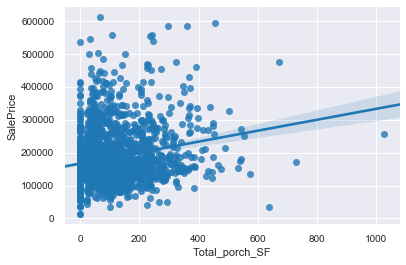

In [170]:
sns.regplot(x = 'Total_porch_SF', y = 'SalePrice', data = train_1);

#### Add column for Test data set

In [171]:
test_1['Total_porch_SF'] = test_1['Screen Porch']+ test_1['Open Porch SF']+ test_1['3Ssn Porch']+ test_1['Enclosed Porch']

In [172]:
test_1['Total_porch_SF'].head()

0    172
1      0
2     24
3    184
4    261
Name: Total_porch_SF, dtype: int64

#### Bsmt sq summation

In [173]:
Bsmt_cols_1 = fnmatch.filter(numeric_cols,'*Bsmt*')

In [174]:
Bsmt_cols_1

['Total Bsmt SF',
 'Bsmt Half Bath',
 'Bsmt Unf SF',
 'BsmtFin SF 2',
 'Bsmt Full Bath',
 'BsmtFin SF 1']

In [175]:
#Check if Summation of 'BsmtFin SF 2', 'Bsmt Unf SF', 'BsmtFin SF 1' = 'Total Bsmt SF'
train_1[Bsmt_cols_1][train_1['BsmtFin SF 2']+ train_1['Bsmt Unf SF']+ train_1['BsmtFin SF 1'] != train_1['Total Bsmt SF']].shape

(0, 6)

#### Check for same relationship in Test dataset

In [176]:
#Check if Summation of 'BsmtFin SF 2', 'Bsmt Unf SF', 'BsmtFin SF 1' = 'Total Bsmt SF'
test_1[Bsmt_cols_1][test_1['BsmtFin SF 2']+ test_1['Bsmt Unf SF']+ test_1['BsmtFin SF 1'] != test_1['Total Bsmt SF']].shape

(0, 6)

#### Bath summation

In [177]:
Bath_cols = fnmatch.filter(numeric_cols,'*Bath*')
Bath_cols

['Full Bath', 'Half Bath', 'Bsmt Half Bath', 'Bsmt Full Bath']

In [178]:
train_1['Total Bath'] = train_1['Bsmt Full Bath']+ train_1['Bsmt Half Bath']+ train_1['Half Bath']+ train_1['Full Bath']

In [179]:
train_1['Total Bath'].head()

0    3.0
1    4.0
2    2.0
3    3.0
4    2.0
Name: Total Bath, dtype: float64

In [180]:
test_1['Total Bath'] = test_1['Bsmt Full Bath']+ test_1['Bsmt Half Bath']+ test_1['Half Bath']+ test_1['Full Bath']

In [181]:
test_1['Total Bath'].head()

0    2.0
1    2.0
2    4.0
3    1.0
4    3.0
Name: Total Bath, dtype: float64

#### Replace Year of property with Age of property. Assumptions;
1. Take Age of Property till current date, month:Oct , Year:2019
2. If Property is not renovated, than use Year build 
3. If Property is renovated, than use Year Renovated.
4. use same method to determine age of Garage.

# Age of Property Train DataSet

In [182]:
#check to ensure year Renovated should be bigger than year build in any data case
train_1[Year_cols][train_1['Year Remod/Add'] >= train_1['Year Built']].shape

(2045, 2)

In [183]:
train_1['Year Remod/Add'].unique().min()
#All properties have been renovated and can be used to determine age of property

1950

In [184]:
train_1['age_property']=train_1['Year Remod/Add'].apply(lambda x : 2019 -x)

In [185]:
train_1['age_property'].head()

0    14
1    22
2    12
3    12
4    26
Name: age_property, dtype: int64

In [186]:
train_1['age_garage'] = train_1['Garage Yr Blt'].apply(lambda x : 2019 - x if x != 0 else 0)

In [187]:
train_1['age_garage'].head()

0    43.0
1    22.0
2    66.0
3    12.0
4    62.0
Name: age_garage, dtype: float64

# Age of Property Test Dataset

In [188]:
test_1.shape

(879, 82)

In [189]:
#check to ensure year Renovated should be bigger than year build in any data case
test_1[Year_cols][test_1['Year Remod/Add'] >= test_1['Year Built']].shape

(879, 2)

In [190]:
test_1['Year Remod/Add'].unique().min()
#use min to see if any properties labelled as zero
# All properties have been renovated and can be used to determine age of property

1950

In [191]:
test_1['Year Remod/Add'].isnull().sum()
#All properties have been renovated and can be used to determine age of property

0

In [192]:
test_1['age_property']=test_1['Year Remod/Add'].apply(lambda x : 2019 -x)

In [193]:
test_1['age_property'].head()

0    69
1    42
2    13
3    13
4    56
Name: age_property, dtype: int64

In [194]:
test_1['age_garage'] = test_1['Garage Yr Blt'].apply(lambda x : 2019 - x if x != 0 else 0)

In [195]:
test_1['age_garage'].head()

0    109.0
1     42.0
2     13.0
3     84.0
4     56.0
Name: age_garage, dtype: float64

### Finalise Continuous 'Numeric' columns to test for heatmap
1. Use summation instead of individual sq, reduce co-linearity
2. Remove Year and replace with age

In [196]:
train_1.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [197]:
new_columns = ['age_garage','age_property','Total_porch_SF','Total Bath']

In [198]:
numeric_cols.extend(new_columns)

In [199]:
numeric_cols

['Full Bath',
 'Half Bath',
 '2nd Flr SF',
 'Total Bsmt SF',
 'Lot Frontage',
 'Bsmt Half Bath',
 'Yr Sold',
 'Bsmt Unf SF',
 '3Ssn Porch',
 'MS SubClass',
 'TotRms AbvGrd',
 'Mo Sold',
 '1st Flr SF',
 'Garage Cars',
 'Low Qual Fin SF',
 'Enclosed Porch',
 'Misc Val',
 'Year Remod/Add',
 'BsmtFin SF 2',
 'Pool Area',
 'Garage Yr Blt',
 'Fireplaces',
 'Wood Deck SF',
 'Garage Area',
 'Bsmt Full Bath',
 'Bedroom AbvGr',
 'Screen Porch',
 'Open Porch SF',
 'Kitchen AbvGr',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'Lot Area',
 'Gr Liv Area',
 'Year Built',
 'age_garage',
 'age_property',
 'Total_porch_SF',
 'Total Bath']

remove summation columns
Many of these columns are inter-link with each other (Mainly through summation of multiple columns into total Square feet), 
Reduce number of features and make each feature correlation to SalePrice more prominent.

In [200]:
columns_to_remove = [ '2nd Flr SF','1st Flr SF','Low Qual Fin SF',
                      'Screen Porch','Open Porch SF', '3Ssn Porch', 'Enclosed Porch',
                       'Year Built','Year Remod/Add','Garage Yr Blt',
                      'BsmtFin SF 2', 'Bsmt Unf SF', 'BsmtFin SF 1',
                     'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 'Full Bath',
                     'MS SubClass']

In [201]:
numeric_cols = list(set(numeric_cols)- set(columns_to_remove))
numeric_cols

['Total Bath',
 'Total Bsmt SF',
 'Lot Frontage',
 'Yr Sold',
 'age_garage',
 'TotRms AbvGrd',
 'Mo Sold',
 'Garage Cars',
 'Total_porch_SF',
 'Misc Val',
 'Pool Area',
 'Fireplaces',
 'Wood Deck SF',
 'Garage Area',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Mas Vnr Area',
 'Lot Area',
 'Gr Liv Area',
 'age_property']

In [202]:
numeric_cols.append('SalePrice')

In [203]:
numeric_cols

['Total Bath',
 'Total Bsmt SF',
 'Lot Frontage',
 'Yr Sold',
 'age_garage',
 'TotRms AbvGrd',
 'Mo Sold',
 'Garage Cars',
 'Total_porch_SF',
 'Misc Val',
 'Pool Area',
 'Fireplaces',
 'Wood Deck SF',
 'Garage Area',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Mas Vnr Area',
 'Lot Area',
 'Gr Liv Area',
 'age_property',
 'SalePrice']

(22, 0)

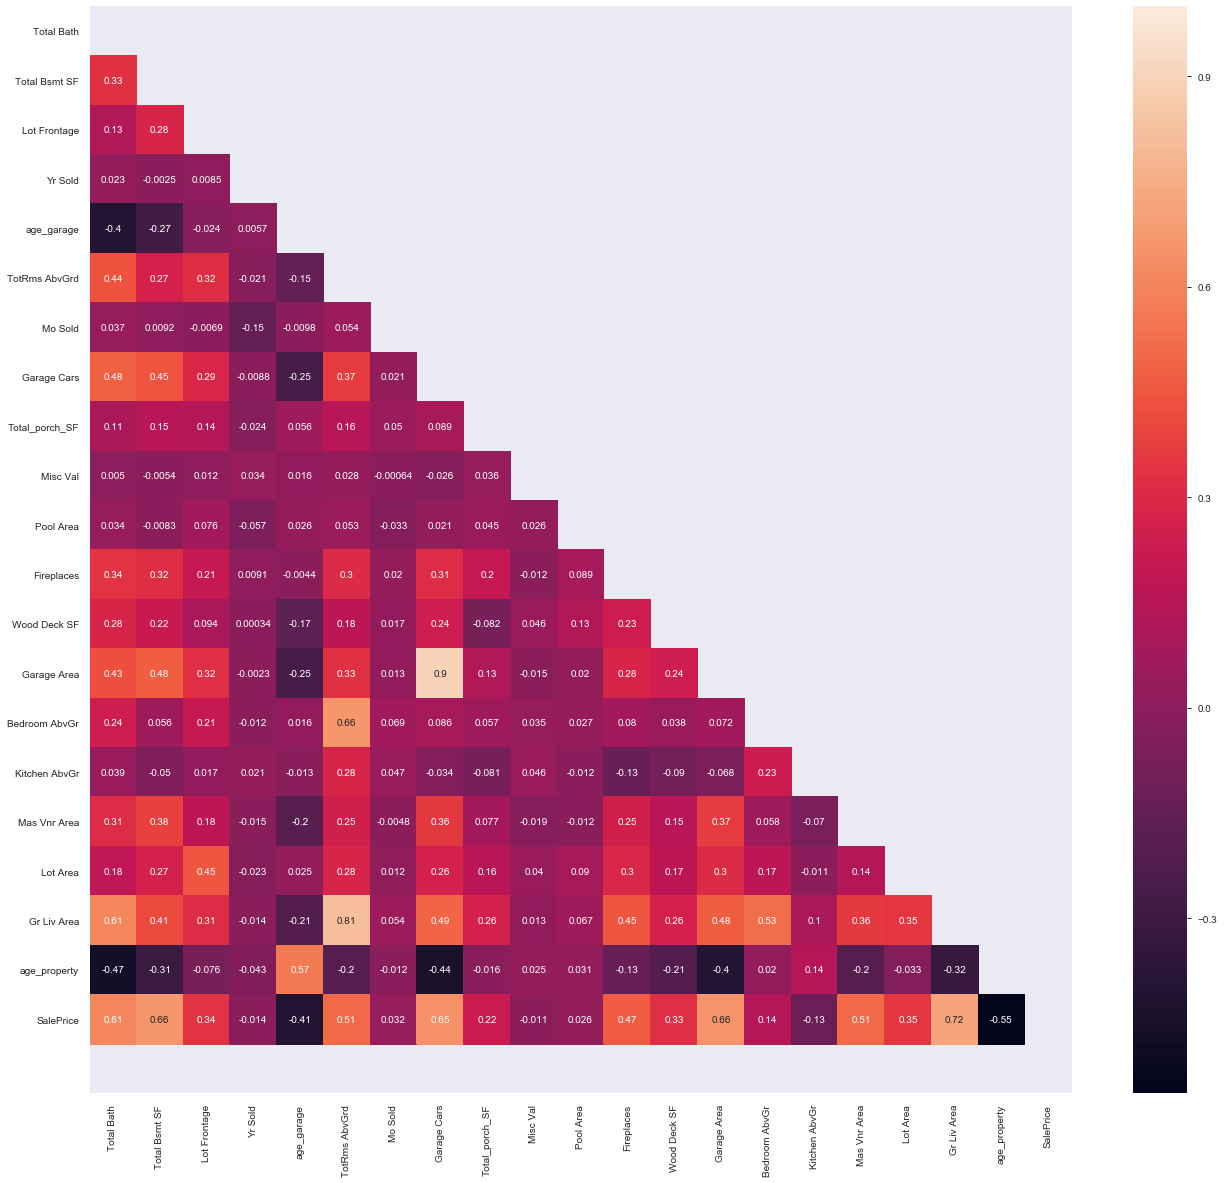

In [204]:
fig = plt.figure(figsize=(22,20))
masking_matrix =np.zeros_like(train_1[numeric_cols].corr())
masking_matrix[np.triu_indices_from(masking_matrix)] = True

ax = sns.heatmap(train_1[numeric_cols].corr(),annot = True,mask =masking_matrix)
ax.get_ylim()
ax.set_ylim(22,0)

In [205]:
#Sort numeric data set by correlation to sale price
numeric_cols_corr =(abs(train_1[numeric_cols].corr()['SalePrice'])).sort_values(ascending = False)
#remove Sale Price
numeric_cols_corr.drop(labels= 'SalePrice',inplace = True)

Set minimum correlation to be approx 0.45 

In [206]:
numeric_cols_corr

Gr Liv Area       0.719040
Total Bsmt SF     0.664331
Garage Area       0.655093
Garage Cars       0.648233
Total Bath        0.611678
age_property      0.549921
TotRms AbvGrd     0.510418
Mas Vnr Area      0.510153
Fireplaces        0.472337
age_garage        0.407616
Lot Area          0.351669
Lot Frontage      0.339919
Wood Deck SF      0.326822
Total_porch_SF    0.220252
Bedroom AbvGr     0.136731
Kitchen AbvGr     0.125476
Mo Sold           0.032266
Pool Area         0.025890
Yr Sold           0.014428
Misc Val          0.010935
Name: SalePrice, dtype: float64

In [207]:
numeric_features = numeric_cols_corr[(numeric_cols_corr>0.45)].index.tolist()

In [208]:
numeric_features # these features are to be expected important indicators to evaluate pricing

['Gr Liv Area',
 'Total Bsmt SF',
 'Garage Area',
 'Garage Cars',
 'Total Bath',
 'age_property',
 'TotRms AbvGrd',
 'Mas Vnr Area',
 'Fireplaces']

### Norminal category columns

### Get dummies for norminal columns Train dataset

In [209]:
'change MS SubClass to object'
train_1['MS SubClass']= train_1['MS SubClass'].apply(str)

In [210]:
train_1['MS SubClass'].dtype

dtype('O')

In [211]:
nominal =[]
nominal =list(set(object_col)-set(ordinal))
nominal.append('MS SubClass') #value is numeric but should be classified as nominal
print(len(nominal))
nominal

22


['Roof Style',
 'Street',
 'Foundation',
 'Lot Config',
 'Condition 2',
 'Roof Matl',
 'Alley',
 'Misc Feature',
 'Bldg Type',
 'Land Contour',
 'House Style',
 'Neighborhood',
 'Condition 1',
 'Garage Type',
 'Exterior 1st',
 'Sale Type',
 'MS Zoning',
 'Mas Vnr Type',
 'Central Air',
 'Exterior 2nd',
 'Heating',
 'MS SubClass']

In [212]:
train_nominal = train_1[nominal]

In [213]:
train_nominal = pd.get_dummies(train_nominal,drop_first=True)    

In [214]:
train_nominal.shape

(2045, 149)

### Get dummies for norminal columns test dataset

In [215]:
test_nominal = test_1[nominal]

In [216]:
test_nominal = pd.get_dummies(test_nominal,drop_first=True)    

In [217]:
test_nominal.shape

(879, 128)

In [218]:
#approx 30 columns missing from either train or test or both
len( list(set(train_nominal.columns) - set (test_nominal.columns)))

30

In [219]:
dummies_cols = list(set(train_nominal.columns) & set (test_nominal.columns))
nominal_features = dummies_cols
train_nominal=train_nominal[dummies_cols]
test_nominal = test_nominal[dummies_cols]

In [220]:
# Check variance of get dummies columns

In [221]:
# Assume that if get dummies column have 90% occurance than it will cause high variance
train_nominal.sum()[(train_nominal.sum() > (0.9*train_nominal.shape[0]))]

Condition 2_Norm    2019
Land Contour_Lvl    1841
Central Air_Y       1904
Street_Pave         2038
dtype: int64

In [222]:
test_nominal.sum()[(test_nominal.sum() > (0.9*test_nominal.shape[0]))]

Condition 2_Norm    875
Central Air_Y       824
Street_Pave         874
dtype: int64

# *Combining all to Features DataFrame

In [223]:
ordinal_features

['Overall Qual', 'Bsmt Qual', 'Garage Finish', 'Fireplace Qu', 'Heating QC']

In [224]:
numeric_features

['Gr Liv Area',
 'Total Bsmt SF',
 'Garage Area',
 'Garage Cars',
 'Total Bath',
 'age_property',
 'TotRms AbvGrd',
 'Mas Vnr Area',
 'Fireplaces']

In [225]:
features =[]
features.append('Id')
features.extend(numeric_features)
features.extend(ordinal_features)
features.append('SalePrice')
features

['Id',
 'Gr Liv Area',
 'Total Bsmt SF',
 'Garage Area',
 'Garage Cars',
 'Total Bath',
 'age_property',
 'TotRms AbvGrd',
 'Mas Vnr Area',
 'Fireplaces',
 'Overall Qual',
 'Bsmt Qual',
 'Garage Finish',
 'Fireplace Qu',
 'Heating QC',
 'SalePrice']

### Combine to final list of features into a single df Train dataset

In [226]:
df_train = train_1[features].join(train_nominal)

In [227]:
df_train.isnull().sum().sum()

0

In [228]:
df_train.head()

,Id,Gr Liv Area,Total Bsmt SF,Garage Area,Garage Cars,Total Bath,age_property,TotRms AbvGrd,Mas Vnr Area,Fireplaces,...,House Style_2.5Unf,Neighborhood_Greens,Roof Matl_WdShake,Sale Type_CWD,Neighborhood_NridgHt,Neighborhood_Gilbert,Neighborhood_Sawyer,Neighborhood_NAmes,Sale Type_ConLw,Garage Type_BuiltIn
0,109,1479,725.0,475.0,2.0,3.0,14,6,289.0,0,...,0,0,0,0,0,0,1,0,0,0
1,544,2122,913.0,559.0,2.0,4.0,22,8,132.0,1,...,0,0,0,0,0,0,0,0,0,0
2,153,1057,1057.0,246.0,1.0,2.0,12,5,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,318,1444,384.0,400.0,2.0,3.0,12,7,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,255,1445,676.0,484.0,2.0,2.0,26,6,0.0,0,...,0,0,0,0,0,0,0,0,0,0


Segarate the features for df_test

In [229]:
features.remove('SalePrice')

In [230]:
df_test = test_1[features].join(test_nominal)

In [231]:
df_test.head()

,Id,Gr Liv Area,Total Bsmt SF,Garage Area,Garage Cars,Total Bath,age_property,TotRms AbvGrd,Mas Vnr Area,Fireplaces,...,House Style_2.5Unf,Neighborhood_Greens,Roof Matl_WdShake,Sale Type_CWD,Neighborhood_NridgHt,Neighborhood_Gilbert,Neighborhood_Sawyer,Neighborhood_NAmes,Sale Type_ConLw,Garage Type_BuiltIn
0,2658,1928,1020.0,440.0,1.0,2.0,69,9,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2718,1967,1967.0,580.0,2.0,2.0,42,10,0.0,0,...,0,0,0,0,0,0,1,0,0,0
2,2414,1496,654.0,426.0,2.0,4.0,13,7,0.0,1,...,0,0,0,0,0,1,0,0,0,0
3,1989,968,968.0,480.0,2.0,1.0,13,5,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,625,1394,1394.0,514.0,2.0,3.0,56,6,247.0,2,...,0,0,0,0,0,0,0,1,0,0


### Save CSV for Modelling 

In [232]:
df_train.to_csv('df_train.csv',index= False)

In [233]:
df_test.to_csv('df_test.csv',index = False)